In [11]:
import os
import numpy as np

lang = 'en'
mode = 'slot'

accents = {
    'en': ['tamil_female', 'bengali_female', 'malayalam_male', 'manipuri_female', 'assamese_female', 'gujarati_male', 'telugu_male', 'kannada_male', 'hindi_female', 'rajasthani_female', 'kannada_female', 'bengali_male', 'tamil_male', 'gujarati_female', 'assamese_male', 'orig'],
    'hi': ['bengali_female', 'bengali_male', 'gujarati_female', 'gujarati_male', 'hindi_female', 'hindi_male', 'kannada_female', 'kannada_male', 'malayalam_female', 'malayalam_male', 'manipuri_female', 'rajasthani_female', 'rajasthani_male', 'tamil_female', 'tamil_male', 'telugu_female', 'telugu_male', 'orig']
}

def find_accuracy(lang, mode):

    if lang == 'hi':
        # HI
        mapping = {
            'bengali_female': 0,
            'bengali_male': 1,
            'gujarati_female': 2,
            'gujarati_male': 3,
            'hindi_female': 4,
            'hindi_male': 5,
            'kannada_female': 6,
            'kannada_male': 7,
            'malayalam_female': 8,
            'malayalam_male': 9,
            'manipuri_female': 10,
            'rajasthani_female': 11,
            'rajasthani_male': 12,
            'tamil_female': 13,
            'tamil_male': 14,
            'telugu_female': 15,
            'telugu_male': 16,
            'orig': 17
        }
    else:
        # EN
        mapping = {
            'assamese_female': 0,
            'assamese_male': 1,
            'bengali_female': 2,
            'bengali_male': 3,
            'gujarati_female': 4,
            'gujarati_male': 5,
            'hindi_female': 6,
            'kannada_female': 7,
            'kannada_male': 8,
            'malayalam_male': 9,
            'manipuri_female': 10,
            'rajasthani_female': 11,
            'tamil_female': 12,
            'tamil_male': 13,
            'telugu_male': 14,
            'orig': 15
        }

    if lang == 'hi':
        ROW = 18
        COL = 18
    else:
        ROW = 16
        COL = 16
    # tamil_female, hindi_female
    accuracies = [[0]*COL for _ in range(ROW)]

    for accent in accents[lang]:
        if mode=='slot':
            dir = 'logs/slot/'
        else:
            dir = 'logs/intent/'
        dir += f"{lang}_{accent}"
        files = os.listdir(dir)
        row = mapping[accent]
        for file in files:
            col = mapping[file]
            with open(dir+'/'+file ,"r") as f:
                line = f.readlines()[-1]
                try:
                    if mode=='slot':
                        acc = round(float(line.split()[-1]), 4)*100
                    else:
                        acc = round(float(line.split()[-4]), 4)*100
                    accuracies[row][col] = acc
                except:
                    print(accent, file)
    
    # for row in accuracies:
    #     for acc in row:
    #         print("{:05.2f}".format(acc), end=' ')
    #     print()
    # if len(accuracy) != 0:
    #     accuracies[accent] = accuracy
    return accuracies

# accuracies = np.array(accuracies, dtype=float)
# accuracies = np.transpose(accuracies)


In [8]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

def plot_heatmap(accuracies, lang, v=0):
    n = len(accents[lang])
    df = pd.DataFrame(accuracies, columns=accents[lang][:(n-v)], dtype=float)
    # print(df)
    sns.heatmap(df, cmap = sns.cm.rocket_r, yticklabels=accents[lang])

76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 
78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 
84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 
73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 
87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 
71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 
87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 
73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 
71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 
83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 
85.42 85.42 85.42 85.42 85.42 

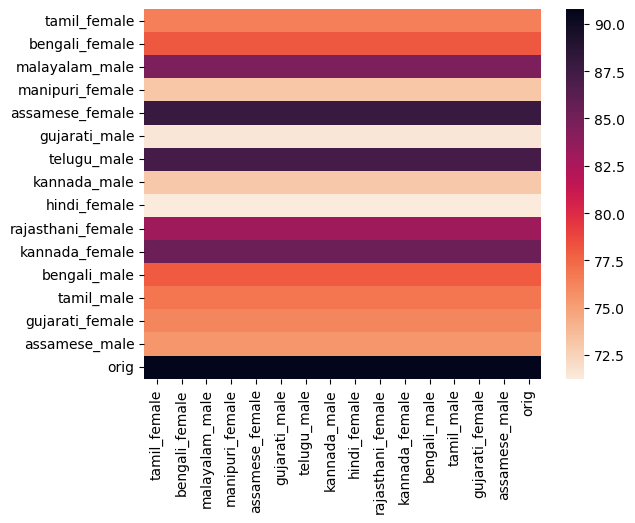

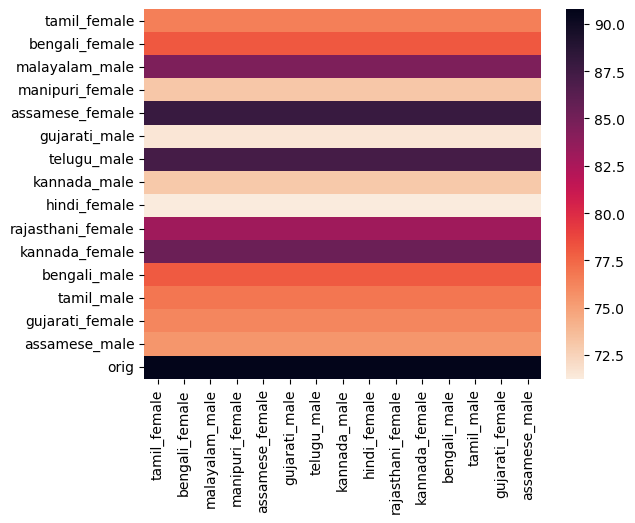

In [9]:
# English
slot_en_acc = find_accuracy(lang='en', mode='slot')
plot_heatmap(slot_en_acc, lang='en')

plt.figure()
slot_en_acc_1 = [acc[:-1] for acc in slot_en_acc]
plot_heatmap(slot_en_acc_1, lang='en', v=1)

for row in slot_en_acc:
    for acc in row:
        print("{:05.2f}".format(acc), end=' ')
    print()

# 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 76.47 
# 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 78.11 
# 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 84.54 
# 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 73.09 
# 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 87.85 
# 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 71.51 
# 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 87.21 
# 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 73.06 
# 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 71.25 
# 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 83.04 
# 85.42 85.42 85.42 85.42 85.42 85.42 85.42 85.42 85.42 85.42 85.42 85.42 85.42 85.42 85.42 85.42 
# 77.99 77.99 77.99 77.99 77.99 77.99 77.99 77.99 77.99 77.99 77.99 77.99 77.99 77.99 77.99 77.99 
# 76.83 76.83 76.83 76.83 76.83 76.83 76.83 76.83 76.83 76.83 76.83 76.83 76.83 76.83 76.83 76.83 
# 76.17 76.17 76.17 76.17 76.17 76.17 76.17 76.17 76.17 76.17 76.17 76.17 76.17 76.17 76.17 76.17 
# 75.51 75.51 75.51 75.51 75.51 75.51 75.51 75.51 75.51 75.51 75.51 75.51 75.51 75.51 75.51 75.51 
# 90.78 90.78 90.78 90.78 90.78 90.78 90.78 90.78 90.78 90.78 90.78 90.78 90.78 90.78 90.78 90.78

99.55 99.55 99.55 99.55 99.55 99.55 99.55 99.55 99.55 99.55 99.55 99.55 99.55 99.55 99.55 99.55 99.55 99.55 
99.16 99.16 99.16 99.16 99.16 99.16 99.16 99.16 99.16 99.16 99.16 99.16 99.16 99.16 99.16 99.16 99.16 99.16 
99.09 99.09 99.09 99.09 99.09 99.09 99.09 99.09 99.09 99.09 99.09 99.09 99.09 99.09 99.09 99.09 99.09 99.09 
80.80 80.80 80.80 80.80 80.80 80.80 80.80 80.80 80.80 80.80 80.80 80.80 80.80 80.80 80.80 80.80 80.80 80.80 
99.20 99.20 99.20 99.20 99.20 99.20 99.20 99.20 99.20 99.20 99.20 99.20 99.20 99.20 99.20 99.20 99.20 99.20 
99.22 99.22 99.22 99.22 99.22 99.22 99.22 99.22 99.22 99.22 99.22 99.22 99.22 99.22 99.22 99.22 99.22 99.22 
86.18 86.18 86.18 86.18 86.18 86.18 86.18 86.18 86.18 86.18 86.18 86.18 86.18 86.18 86.18 86.18 86.18 86.18 
49.62 49.62 49.62 49.62 49.62 49.62 49.62 49.62 49.62 49.62 49.62 49.62 49.62 49.62 49.62 49.62 49.62 49.62 
78.06 78.06 78.06 78.06 78.06 78.06 78.06 78.06 78.06 78.06 78.06 78.06 78.06 78.06 78.06 78.06 78.06 78.06 
49.48 49.48 49.48 4

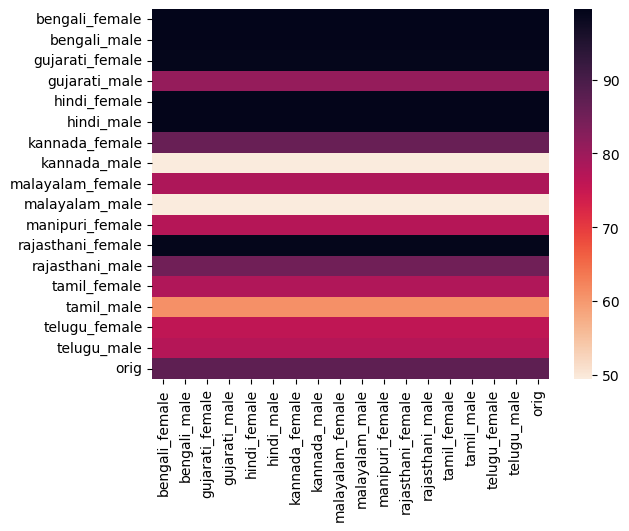

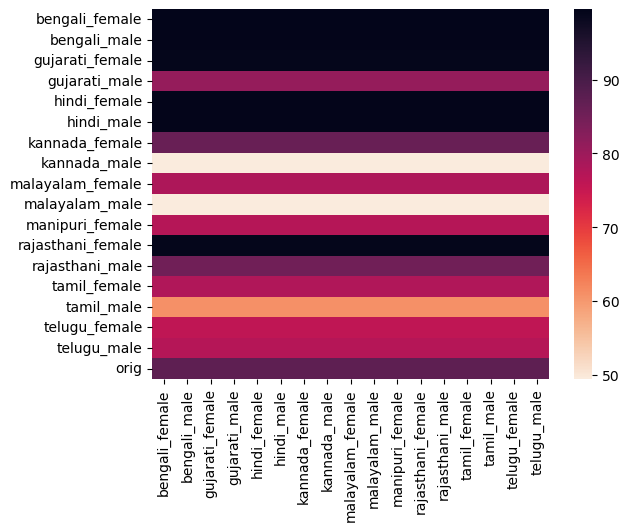

In [13]:
# Hindi
slot_hi_acc = find_accuracy(lang='hi', mode='slot')
plot_heatmap(slot_hi_acc, lang='hi')

plt.figure()
slot_hi_acc_1 = [acc[:-1] for acc in slot_hi_acc]
plot_heatmap(slot_hi_acc_1, lang='hi', v=1)

for row in slot_hi_acc:
    for acc in row:
        print("{:05.2f}".format(acc), end=' ')
    print()

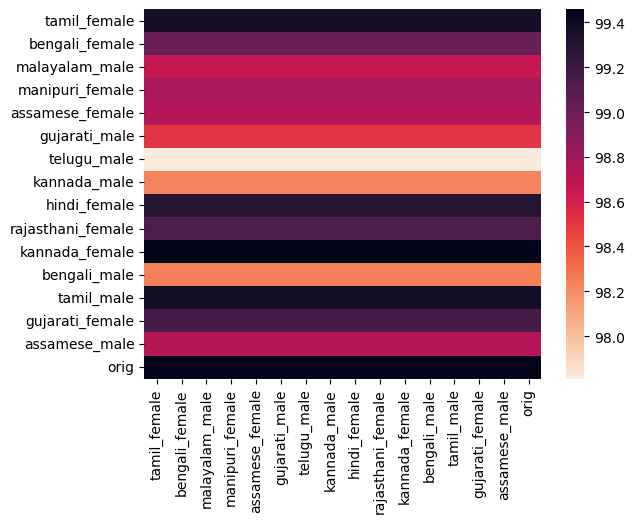

In [ ]:
# Slot - English
slot_en_acc = find_accuracy(lang='en', mode='slot')
slot_en_acc[-1] = [99.45 for _ in range(len(slot_en_acc[-1]))]
plot_heatmap(slot_en_acc, lang='en')

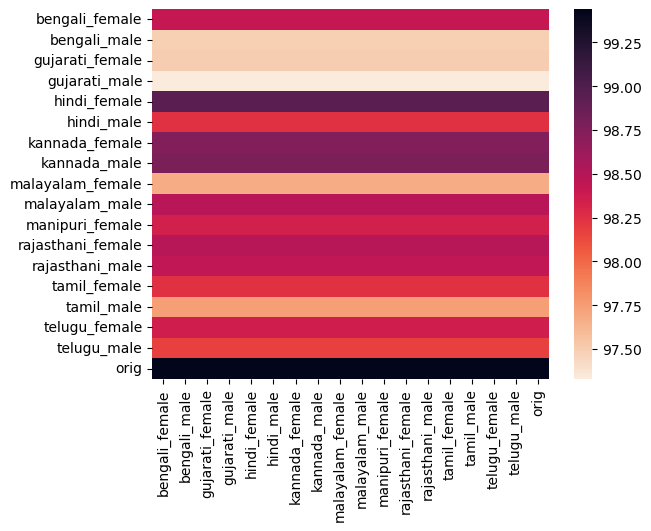

In [ ]:
# Slot - Hindi
slot_hi_acc = find_accuracy(lang='hi', mode='slot')
slot_hi_acc[-1] = [99.44 for _ in range(len(slot_hi_acc[-1]))]
plot_heatmap(slot_hi_acc, lang='hi')